In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from collections import Counter
from wordcloud import WordCloud
from collections import Counter

In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Define directories for the datasets
DATA_DIR = "./data/raw_data"
CHESS_DIR = os.path.join(DATA_DIR, "chess")

# Ensure directories exist
os.makedirs(CHESS_DIR, exist_ok=True)

# Function to download datasets from Kaggle
def download_dataset(dataset, path):
    api = KaggleApi()
    api.authenticate()  # Ensure you have your Kaggle API token set up
    print(f"Downloading {dataset} dataset...")
    api.dataset_download_files(dataset, path=path, unzip=True)
    print(f"Downloaded and extracted to {path}")

if __name__ == "__main__":
    # Chess Dataset (small enough to include in repo)
    chess_dataset = 'datasnaek/chess'
    download_dataset(chess_dataset, CHESS_DIR)
    
    print("All datasets downloaded and ready.")

Dataset URL: https://www.kaggle.com/datasets/datasnaek/chess
Downloaded and extracted to ./data/raw_data/chess
All datasets downloaded and ready.


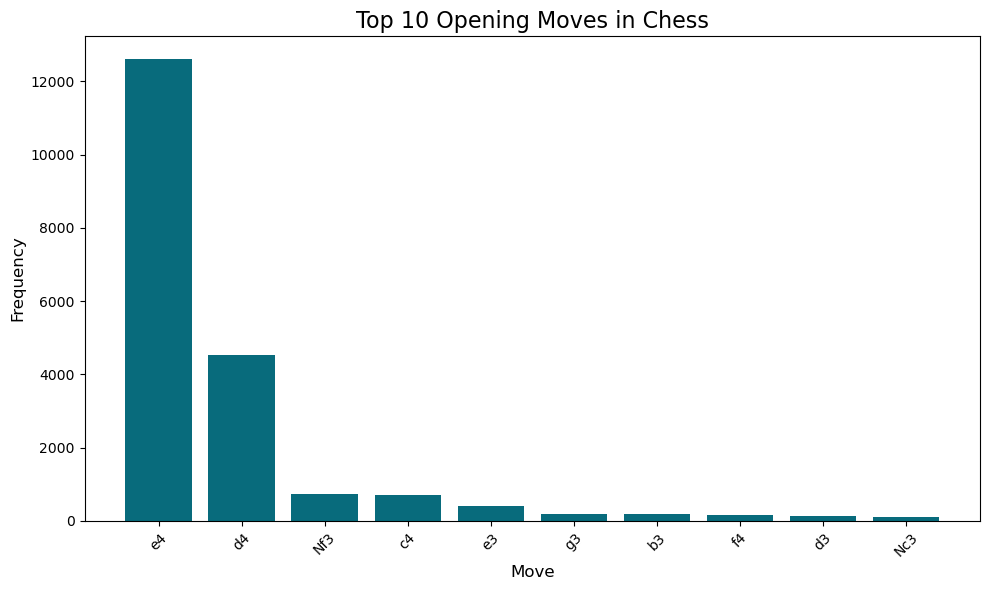

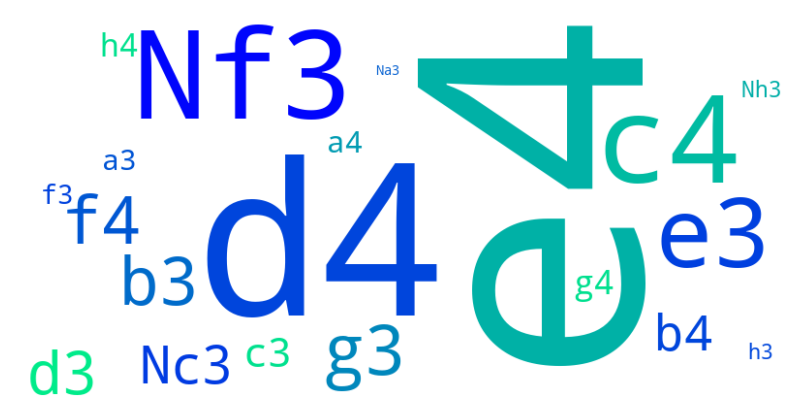

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Load the dataset (assuming you have the chess dataset in CSV format)
chess_data = pd.read_csv('./data/raw_data/chess/games.csv')

# Extract moves from the games
# Assuming 'moves' column contains the sequence of moves in chess notation
moves = chess_data['moves']

# Get only the first move from each game (common opening move)
opening_moves = [move.split()[0] for move in moves if len(move.split()) > 0]

# Count the frequency of each opening move
move_counts = Counter(opening_moves)

# Convert to DataFrame for easy plotting
move_df = pd.DataFrame(move_counts.items(), columns=['Move', 'Frequency'])

# Sort by frequency for bar chart
move_df = move_df.sort_values(by='Frequency', ascending=False)

# Bar Chart Visualization (with teal/cyan color theme)
plt.figure(figsize=(10, 6))
plt.bar(move_df['Move'][:10], move_df['Frequency'][:10], color='#086b7c')  # Use teal color for bars
plt.title('Top 10 Opening Moves in Chess', fontsize=16)
plt.xlabel('Move', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Word Cloud Visualization (with teal/cyan color theme)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='winter').generate_from_frequencies(move_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


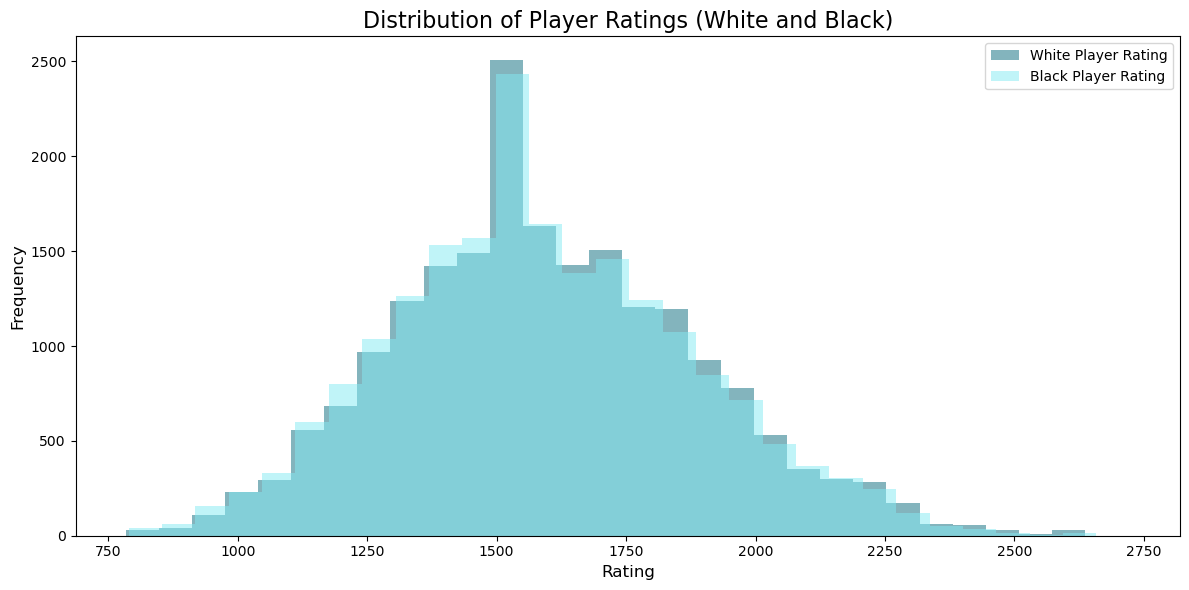

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming you have the chess dataset in CSV format)
chess_data = pd.read_csv('./data/raw_data/chess/games.csv')

# Extract player ratings for both white and black
white_ratings = chess_data['white_rating']
black_ratings = chess_data['black_rating']

# Drop any missing values if they exist
white_ratings = white_ratings.dropna()
black_ratings = black_ratings.dropna()

# Plot histograms for both white and black ratings
plt.figure(figsize=(12, 6))

# White player ratings (teal color)
plt.hist(white_ratings, bins=30, alpha=0.5, label='White Player Rating', color='#086b7c')

# Black player ratings (light cyan color)
plt.hist(black_ratings, bins=30, alpha=0.5, label='Black Player Rating', color='#83ebf3')

# Add titles and labels
plt.title('Distribution of Player Ratings (White and Black)', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


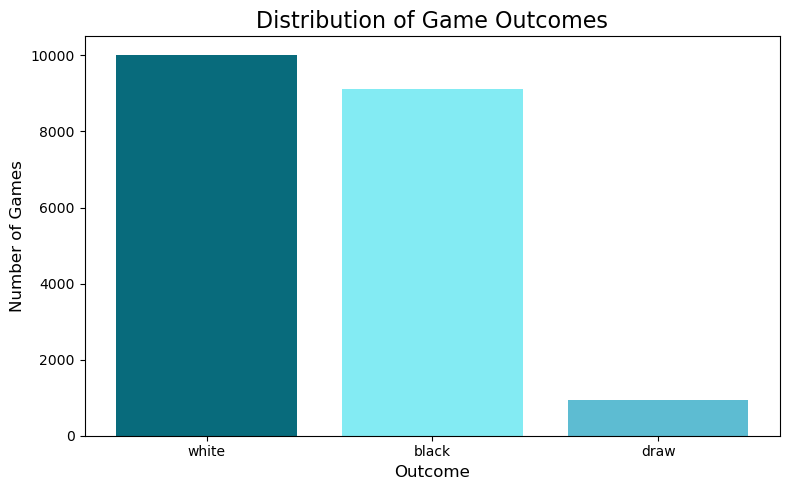

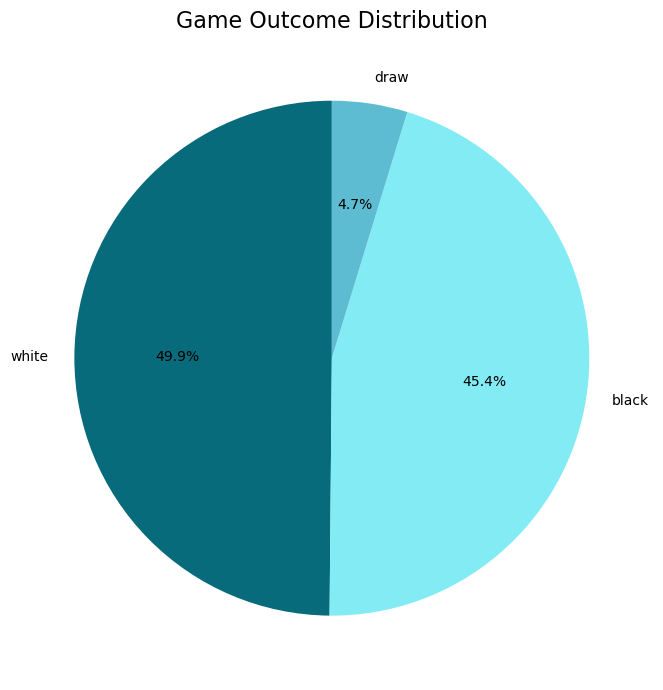

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming you have the chess dataset in CSV format)
chess_data = pd.read_csv('./data/raw_data/chess/games.csv')

# Assuming the dataset has a 'winner' column with values 'white', 'black', or 'draw'
outcome_counts = chess_data['winner'].value_counts()

# Bar Chart Visualization
plt.figure(figsize=(8, 5))
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'orange', 'green'])
plt.title('Distribution of Game Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

# Pie Chart Visualization
plt.figure(figsize=(7, 7))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green'])
plt.title('Game Outcome Distribution')
plt.tight_layout()
plt.show()


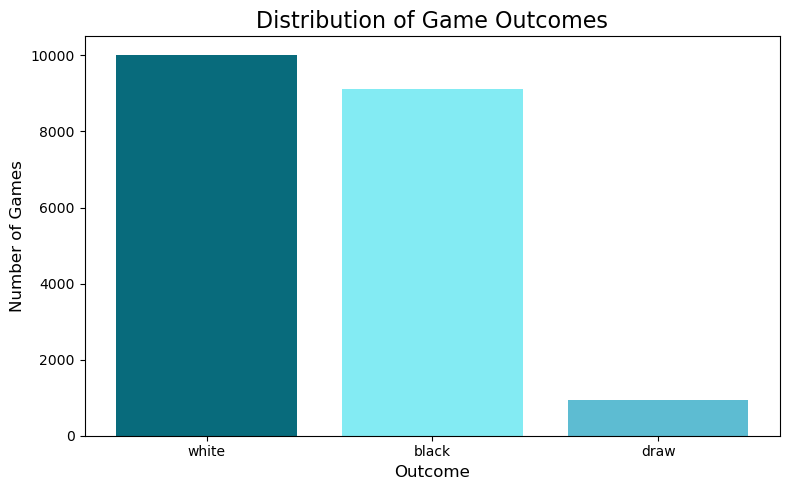

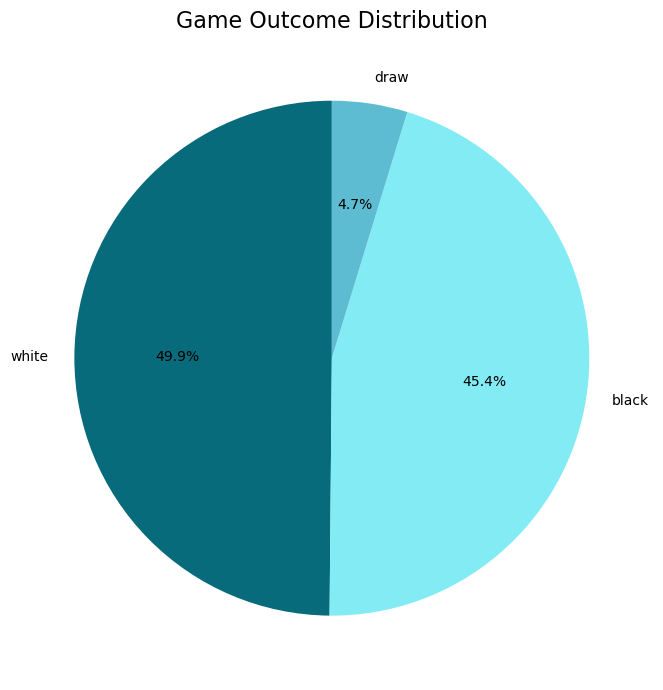

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming you have the chess dataset in CSV format)
chess_data = pd.read_csv('./data/raw_data/chess/games.csv')

# Assuming the dataset has a 'winner' column with values 'white', 'black', or 'draw'
outcome_counts = chess_data['winner'].value_counts()

# Custom colors based on the provided hex codes
colors = ['#086b7c', '#83ebf3', '#5dbcd2']  # Third color for the draw (using a variation of the theme)

# Bar Chart Visualization
plt.figure(figsize=(8, 5))
plt.bar(outcome_counts.index, outcome_counts.values, color=colors)
plt.title('Distribution of Game Outcomes', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Pie Chart Visualization
plt.figure(figsize=(7, 7))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Game Outcome Distribution', fontsize=16)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

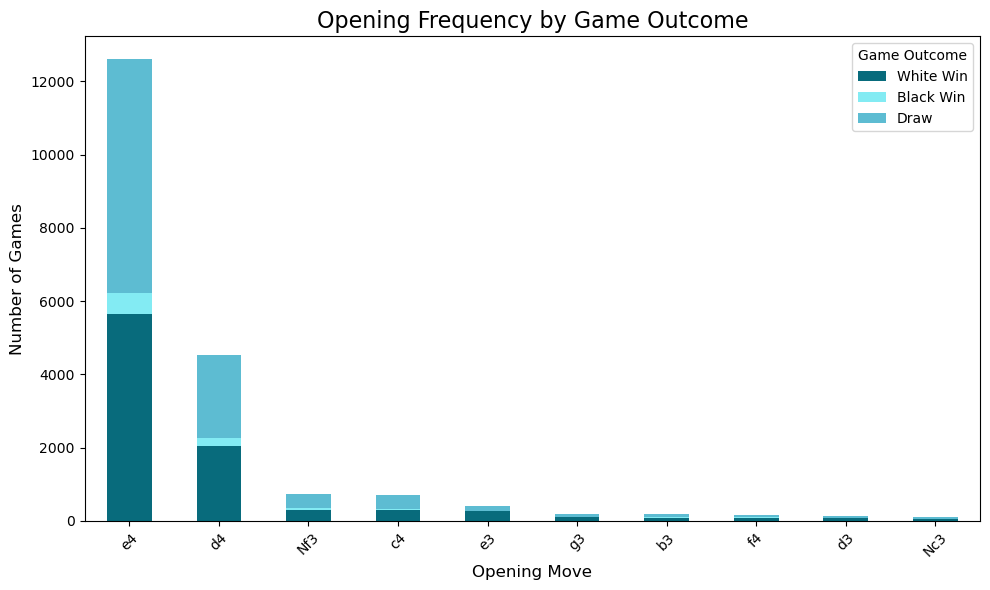

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset (assuming you have the chess dataset in CSV format)
chess_data = pd.read_csv('./data/raw_data/chess/games.csv')

# Extract moves and winner from the games
moves = chess_data['moves']
results = chess_data['winner']  # Assuming 'winner' column has 'white', 'black', and 'draw'

# Get the first move from each game as the opening move
opening_moves = [move.split()[0] for move in moves if len(move.split()) > 0]

# Create a DataFrame with opening moves and the result of the game
opening_df = pd.DataFrame({'Opening': opening_moves, 'Result': results})

# Count the occurrences of each result (white, black, draw) for each opening move
opening_result_counts = opening_df.groupby(['Opening', 'Result']).size().unstack(fill_value=0)

# Get the top 10 most common openings
top_openings = opening_df['Opening'].value_counts().nlargest(10).index

# Filter the counts for only the top 10 openings
opening_result_counts = opening_result_counts.loc[top_openings]

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
opening_result_counts.plot(kind='bar', stacked=True, color=['#086b7c', '#83ebf3', '#5dbcd2'], figsize=(10, 6))

# Add titles and labels
plt.title('Opening Frequency by Game Outcome', fontsize=16)
plt.xlabel('Opening Move', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Game Outcome', labels=['White Win', 'Black Win', 'Draw'])

# Display the plot
plt.tight_layout()
plt.show()


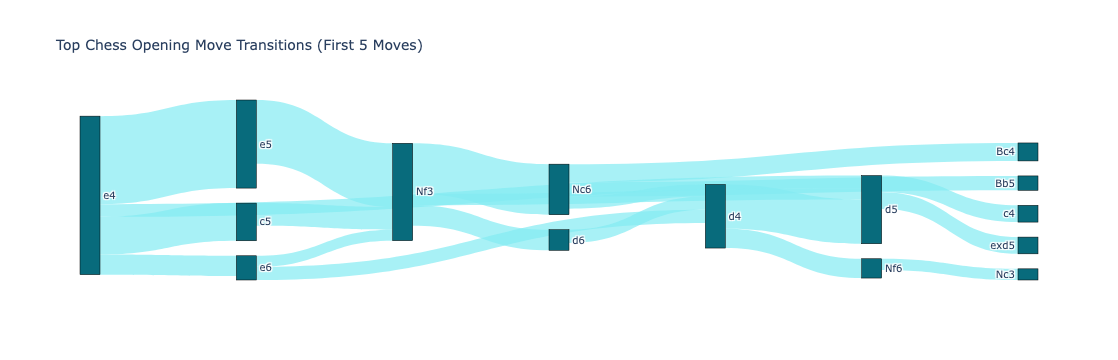

In [43]:
import pandas as pd
from collections import Counter
import plotly.graph_objects as go

# Load the dataset (assuming you have the chess dataset in CSV format)
chess_data = pd.read_csv('./data/raw_data/chess/games.csv')

# Extract the moves column
moves = chess_data['moves']

# Focus on the first 5 moves for this visualization (opening sequences)
move_sequences = [move.split()[:5] for move in moves if len(move.split()) >= 5]

# Count transitions between moves (first move -> second move -> third move -> fourth move -> fifth move)
transitions = []
for seq in move_sequences:
    transitions.append((seq[0], seq[1]))  # First move -> Second move
    transitions.append((seq[1], seq[2]))  # Second move -> Third move
    transitions.append((seq[2], seq[3]))  # Third move -> Fourth move
    transitions.append((seq[3], seq[4]))  # Fourth move -> Fifth move

# Count the frequency of each transition
transition_counts = Counter(transitions)

# Limit to top 20 transitions to avoid kernel crashes
top_transitions = transition_counts.most_common(20)

# Prepare the data for the Sankey diagram
all_moves = list(set([item for sublist in top_transitions for item in sublist[0]]))  # Unique moves
move_indices = {move: i for i, move in enumerate(all_moves)}  # Assign each move an index

# Source and target moves for the Sankey diagram
sources = [move_indices[t[0]] for t, _ in top_transitions]
targets = [move_indices[t[1]] for t, _ in top_transitions]
values = [count for _, count in top_transitions]  # Frequency of each transition

# Create the Sankey diagram with teal/cyan color theme
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_moves,  # List of unique moves as labels
        color=['#086b7c'] * len(all_moves)  # Use teal for nodes
    ),
    link=dict(
        source=sources,  # Index of source moves
        target=targets,  # Index of target moves
        value=values,    # Corresponding transition frequencies
        color='rgba(131, 235, 243, 0.7)'  # Light cyan color for the flow
    )
))

# Update layout and title
fig.update_layout(title_text="Top Chess Opening Move Transitions (First 5 Moves)", font_size=10)

# Show the plot
fig.show()
